                                            Домашнє Завдання N 2

                                    Частина третя: Аналіз датасет c Kaggle.com

In [1]:
# imports
%matplotlib inline
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.__version__, np.__version__

('2.1.4', '1.26.3')

In [2]:
# Прочитайте csv файл (використовуйте функцію read_csv)

data = pd.read_csv('bestsellers with categories.csv')

data

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [3]:
# Виведіть перші п'ять рядків (використовується функція head)

data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [5]:
# Виведіть розміри датасету (використовуйте атрибут shape)

data.shape

print(f'rows - {data.shape[0]}, columns - {data.shape[1]}')

rows - 550, columns - 7


Cкільки книг зберігає дані датасет?

In [6]:
print(f"Даний датасет зберігає - {data.shape[0]} книг")

Даний датасет зберігає - 550 книг


In [7]:
data.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

<font size="5">Первинне дослідження даних</font>

In [5]:
# Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)

missing_values = data.isna().sum()

missing_values

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

Чи є в якихось змінних пропуски? (Так / ні)

НІ

In [8]:
# Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

unique_genres = data['genre'].unique()

unique_genres

array(['Non Fiction', 'Fiction'], dtype=object)

Які є унікальні жанри?

'Non Fiction', 'Fiction'

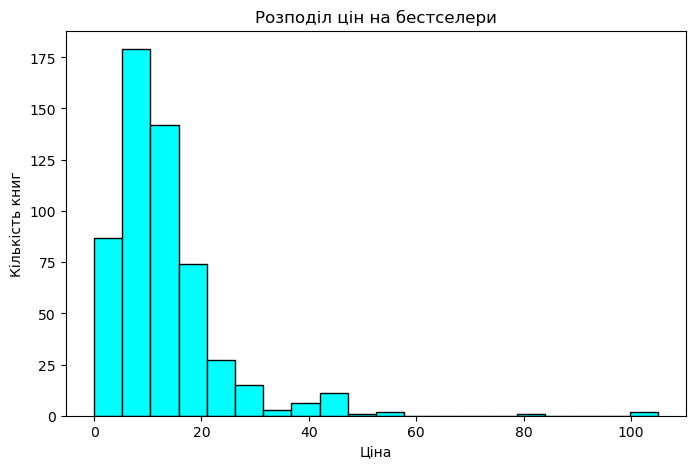

In [9]:
# Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

data['price'].plot(kind='hist', bins=20, color='cyan', edgecolor='black', figsize=(8, 5))

plt.title('Розподіл цін на бестселери')
plt.xlabel('Ціна')
plt.ylabel('Кількість книг')

plt.show()

In [10]:
# Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

max_price = data['price'].max()
min_price = data['price'].min()
average_price = data['price'].mean()
median_price = data['price'].median()

In [11]:
print("Максимальна ціна?")
max_price

Максимальна ціна?


105

In [12]:
print("Мінімальна ціна?")
min_price

Мінімальна ціна?


0

In [31]:
print("Середня ціна?")
average_price

Середня ціна?


13.1

In [13]:
print("Медіанна ціна?")
median_price

Медіанна ціна?


11.0

<font size="5">Пошук та сортування даних</font>

In [14]:
print("Який рейтинг у датасеті найвищий? Відповідь:")
highest_rating = data['user_rating'].max()
highest_rating

Який рейтинг у датасеті найвищий? Відповідь:


4.9

In [34]:
print("Скільки книг мають такий рейтинг? Відповідь:")
books_with_highest_rating = data[data['user_rating'] == highest_rating].shape[0]
books_with_highest_rating

Скільки книг мають такий рейтинг? Відповідь:


52

In [15]:
print("Яка книга має найбільше відгуків? Відповідь:")
max_reviews = data['reviews'].max()
book_with_max_reviews = data[data['reviews'] == max_reviews]['name']
book_with_max_reviews

Яка книга має найбільше відгуків? Відповідь:


534    Where the Crawdads Sing
Name: name, dtype: object

In [16]:
print("З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь:")
books_2015 = data[data['year'] == 2015]
max_price_2015 = books_2015['price'].max()
most_expensive_book_2015 = books_2015[books_2015['price'] == max_price_2015]['name']
most_expensive_book_2015

З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь:


277    Publication Manual of the American Psychologic...
Name: name, dtype: object

In [40]:
print("Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь:")
fiction_books_in_2010 = data[(data['genre'] == 'Fiction') & (data['year'] == 2010)]
number_of_fiction_books_in_2010 = fiction_books_in_2010.shape[0]
number_of_fiction_books_in_2010

Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь:


20

In [18]:
print("Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь:")
books_2010_2011 = data[(data['year'].isin([2010, 2011])) & (data['user_rating'] == 4.9)]
number_of_books_with_4_9 = books_2010_2011.shape[0]
number_of_books_with_4_9

Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь:


1

In [19]:
print("Яка книга остання у відсортованому списку? Відповідь")
less_price_2015 = data[(data['year'] == 2015) & (data['price'] < 8)]
sorted_cheap_books_2015 = less_price_2015.sort_values(by='price', ascending=True)
last_book_in_sorted_list = sorted_cheap_books_2015.iloc[-1]['name']
last_book_in_sorted_list

Яка книга остання у відсортованому списку? Відповідь


'Old School (Diary of a Wimpy Kid #10)'

<font size="5">Агрегування даних та з'єднання таблиць</font>

In [23]:
# Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам

genre_price_stats = data.groupby('genre')['price'].agg(['min', 'max'])
genre_price_stats

,min,max
genre,,
Fiction,0,82
Non Fiction,0,105


In [30]:
print("Максимальна ціна для жанру Fiction: Відповідь")
fiction_max_price = genre_price_stats.loc['Fiction', 'max']
fiction_max_price

Максимальна ціна для жанру Fiction: 82


In [27]:
print("Мінімальна ціна для жанру Fiction: Відповідь")
fiction_min_price = genre_price_stats.loc['Fiction', 'min']
fiction_min_price

Мінімальна ціна для жанру Fiction: Відповідь


0

In [31]:
print("Максимальна ціна для жанру Non Fiction: Відповідь")
non_fiction_max_price = genre_price_stats.loc['Non Fiction', 'max']
non_fiction_max_price

Максимальна ціна для жанру Non Fiction: Відповідь


105

In [33]:
print("Мінімальна ціна для жанру Non Fiction: Відповідь")
non_fiction_min_price = genre_price_stats.loc['Non Fiction', 'min']
non_fiction_min_price

Мінімальна ціна для жанру Non Fiction: Відповідь


0

In [34]:
# Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні

books_per_author = data.groupby('author')['name'].count().reset_index(name='book_count')
books_per_author

,author,book_count
0,Abraham Verghese,2
1,Adam Gasiewski,1
2,Adam Mansbach,1
3,Adir Levy,1
4,Admiral William H. McRaven,1
...,...,...
243,Walter Isaacson,3
244,William Davis,2
245,William P. Young,2
246,Wizards RPG Team,3


In [35]:
print("Якої розмірності вийшла таблиця? Відповідь:")
f"rows - {books_per_author.shape[0]}, columns - {books_per_author.shape[1]}"

Якої розмірності вийшла таблиця? Відповідь:


'rows - 248, columns - 2'

In [36]:
print("Який автор має найбільше книг? Відповідь:")
most_books_author = books_per_author.loc[books_per_author['book_count'].idxmax()]['author']
most_books_author

Який автор має найбільше книг? Відповідь:


'Jeff Kinney'

In [37]:
print("Скільки книг цього автора? Відповідь:")
most_books_count = books_per_author['book_count'].max()
most_books_count

Скільки книг цього автора? Відповідь:


12

In [43]:
# Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні

average_rating_per_author = data.groupby('author')['user_rating'].mean().reset_index(name='average_rating').round(2)
average_rating_per_author

,author,average_rating
0,Abraham Verghese,4.60
1,Adam Gasiewski,4.40
2,Adam Mansbach,4.80
3,Adir Levy,4.80
4,Admiral William H. McRaven,4.70
...,...,...
243,Walter Isaacson,4.57
244,William Davis,4.40
245,William P. Young,4.60
246,Wizards RPG Team,4.80


In [44]:
print("У якого автора середній рейтинг мінімальний? Відповідь:")
min_avg_rating_info = average_rating_per_author[average_rating_per_author['average_rating'] == average_rating_per_author['average_rating'].min()]
min_avg_rating_info

У якого автора середній рейтинг мінімальний? Відповідь:


,author,average_rating
71,Donna Tartt,3.9


In [47]:
print("Який у цього автора середній рейтинг? Відповідь:")
min_avg_rating = min_avg_rating_info['average_rating'].iloc[0]
min_avg_rating

Який у цього автора середній рейтинг? Відповідь:


3.9

In [48]:
# З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну

combined_2_dataframes = pd.concat([books_per_author.set_index('author'), average_rating_per_author.set_index('author')], axis=1)
combined_2_dataframes

,book_count,average_rating
author,,
Abraham Verghese,2,4.60
Adam Gasiewski,1,4.40
Adam Mansbach,1,4.80
Adir Levy,1,4.80
Admiral William H. McRaven,1,4.70
...,...,...
Walter Isaacson,3,4.57
William Davis,2,4.40
William P. Young,2,4.60


In [49]:
# Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)

sorted_combined_dataframes = combined_2_dataframes.sort_values(by=['book_count', 'average_rating'], ascending=[True, True])
sorted_combined_dataframes

,book_count,average_rating
author,,
Muriel Barbery,1,4.00
Chris Cleave,1,4.10
Ian K. Smith M.D.,1,4.10
Pierre Dukan,1,4.10
Elizabeth Strout,1,4.20
...,...,...
American Psychological Association,10,4.50
Suzanne Collins,11,4.66
Gary Chapman,11,4.74


In [50]:
print("Відповідь: Який автор перший у списку?")

first_author_in_list = sorted_combined_dataframes.index[0]
first_author_in_list

Відповідь: Який автор перший у списку?


'Muriel Barbery'

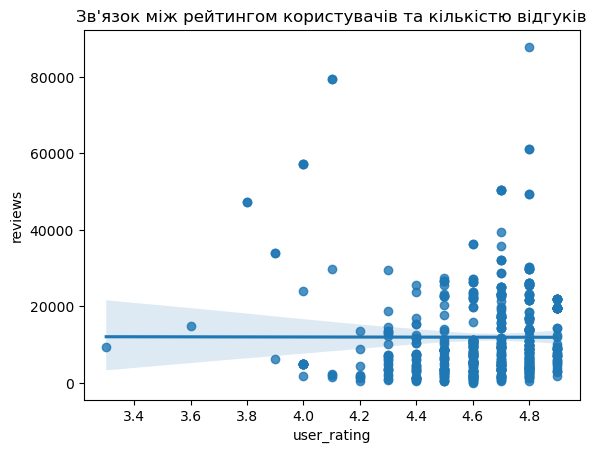

In [52]:
# Лінійна регресія звʼязку між рейтингом користувачів та кількістю відгуків

sns.regplot(x='user_rating', y='reviews', data=data)
plt.title('Зв\'язок між рейтингом користувачів та кількістю відгуків')

plt.show()

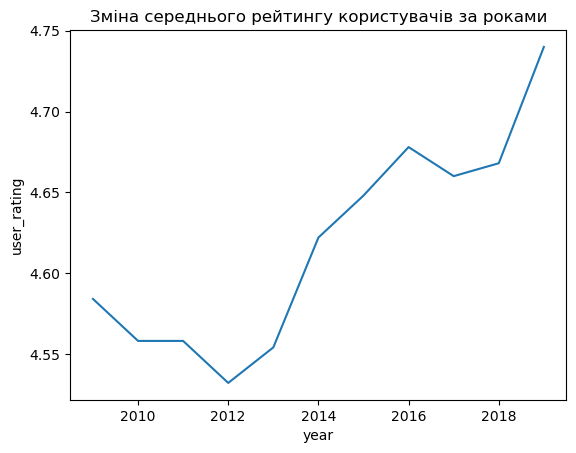

In [61]:
# Лінійний графік зміни середнього рейтингу користувачів за роками

avg_rating_per_year = data.groupby('year')['user_rating'].mean().reset_index()
sns.lineplot(x='year', y='user_rating', data=avg_rating_per_year)
plt.title('Зміна середнього рейтингу користувачів за роками')
plt.show()

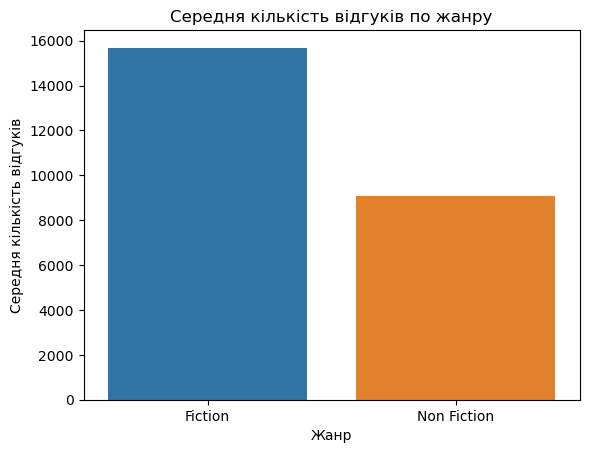

In [58]:
# 

reviews_per_genre = data.groupby('genre')['reviews'].mean().reset_index()

# Створення стовпчикової діаграми
sns.barplot(x='genre', y='reviews', data=reviews_per_genre)
plt.title('Середня кількість відгуків по жанру')
plt.ylabel('Середня кількість відгуків')
plt.xlabel('Жанр')
plt.show()